```
# 🐱Vs 🐶 Classifier

##Training Cnn on the giving data



###Import the required libraries



In [7]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
import os
import zipfile
!pip install --upgrade ultralytics


###Download the data

In [17]:
zip_path = "archive (15).zip"
extract_path = "./dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

dataset_url = extract_path

train_dir = os.path.join(dataset_url, 'train')
test_dir = os.path.join(dataset_url, 'test')

cats_train = os.listdir(os.path.join(train_dir, 'cats'))
print('Number of cat images for training:', len(cats_train))



Number of cat images for training: 279


In [18]:
cats_train = os.listdir(os.path.join(train_dir, 'cats'))
print('Number of cat images for training: ', len(cats_train))

dogs_train = os.listdir(os.path.join(train_dir, 'dogs'))
print('Number of dog images for training: ', len(dogs_train))

cats_test = os.listdir(os.path.join(test_dir, 'cats'))
print('Number of cat images for testing: ', len(cats_test))

dogs_test = os.listdir(os.path.join(test_dir, 'dogs'))
print('Number of dog images for testing: ', len(dogs_test))

Number of cat images for training:  279
Number of dog images for training:  278
Number of cat images for testing:  70
Number of dog images for testing:  70


###Data preproccing

In [19]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)


test_ds = image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [20]:
print("Class names:", train_ds.class_names)


Class names: ['cats', 'dogs']


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

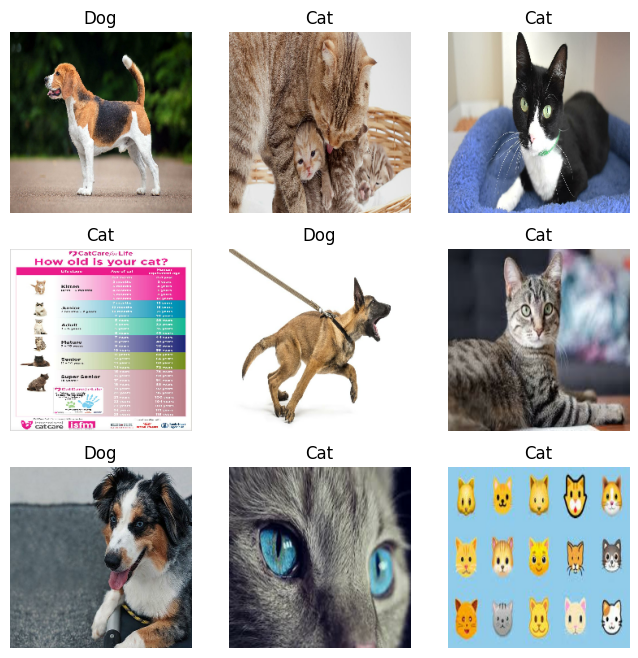

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Dog" if labels[i] == 1 else "Cat")
        plt.axis("off")
plt.show()


###Training the Model

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),


    layers.Dense(1, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 20

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=test_ds
)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.5225 - loss: 1.0954 - val_accuracy: 0.5000 - val_loss: 0.6987
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.5091 - loss: 0.6920 - val_accuracy: 0.5214 - val_loss: 0.7083
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.5675 - loss: 0.6760 - val_accuracy: 0.6357 - val_loss: 0.6918
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.6798 - loss: 0.6230 - val_accuracy: 0.6500 - val_loss: 0.6844
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.7297 - loss: 0.5626 - val_accuracy: 0.6357 - val_loss: 0.7117
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.7828 - loss: 0.5000 - val_accuracy: 0.6786 - val_loss: 0.6434
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.8239 - loss: 0.3887 - val_accuracy: 0.6357 - val_loss: 0.8587
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.8750 - loss: 0.3170 - val_accuracy: 0.6857 - val_loss:

###Model Evaluation and plotting

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4883 - loss: 0.6932
Test Accuracy: 0.50


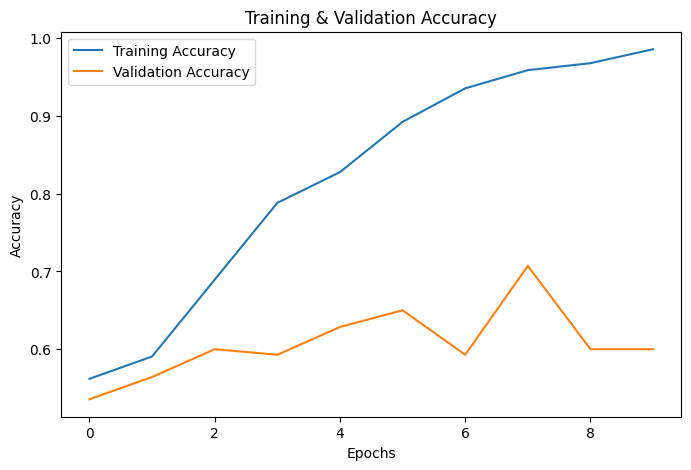

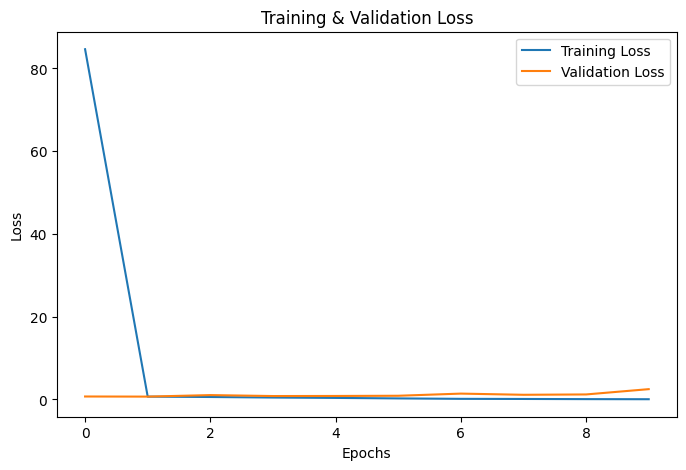

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for i in range(len(validation_generator)):
    images, labels = validation_generator[i]
    preds = model.predict(images)
    y_true.extend(labels)
    y_pred.extend(preds.flatten())


y_pred_bin = [1 if p > 0.5 else 0 for p in y_pred]

print(classification_report(y_true, y_pred_bin, target_names=["Cat", "Dog"]))

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_image.jpg'

##Training different Cnn With different preprocessing way

In [27]:
train_dir = 'dataset/train'
test_dir = 'dataset/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.4904 - loss: 1.2691 - val_accuracy: 0.5500 - val_loss: 0.6925
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.5331 - loss: 0.6898 - val_accuracy: 0.5357 - val_loss: 0.6928
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.5356 - loss: 0.6914 - val_accuracy: 0.5714 - val_loss: 0.6901
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.5997 - loss: 0.6773 - val_accuracy: 0.5143 - val_loss: 0.6936
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.6010 - loss: 0.6737 - val_accuracy: 0.5571 - val_loss: 0.7092
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.6153 - loss: 0.6606 - val_accuracy: 0.6643 - val_loss: 0.6933
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step - accuracy: 0.6584 - loss: 0.6513 - val_accuracy: 0.5786 - val_loss: 0.6948
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step - accuracy: 0.5852 - loss: 0.6676 - val_accuracy: 0.6071 - val_loss:

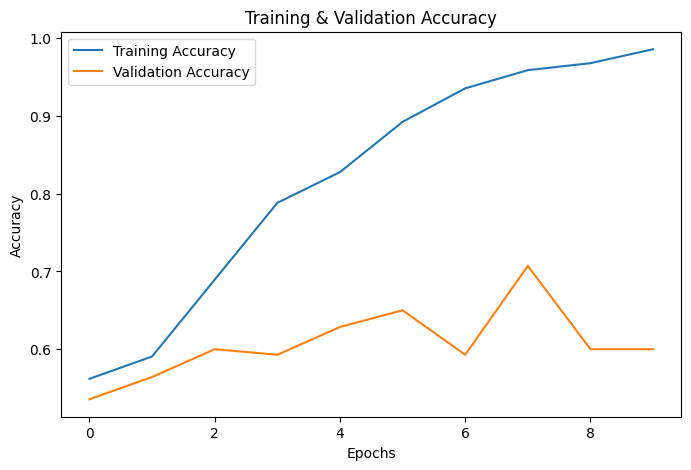

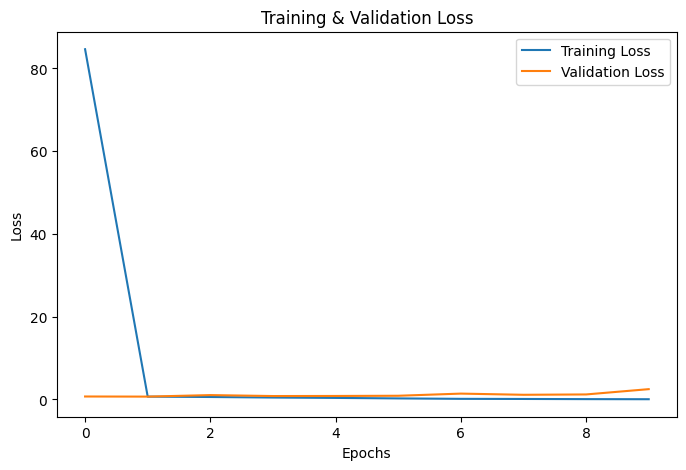

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.show()


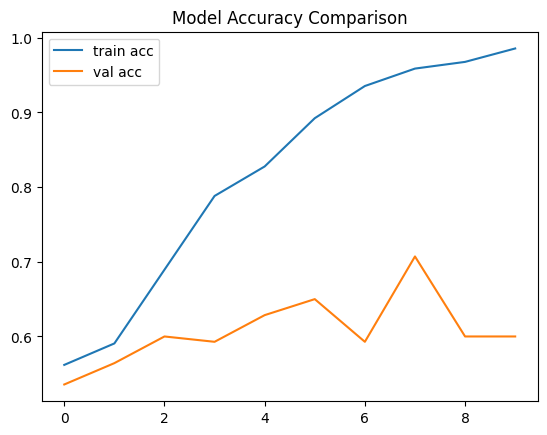

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Model Loss")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


<ipython-input-40-b1fdb9de12bb>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {int(labels[i])}, Pred: {int(preds[i] > 0.5)}")


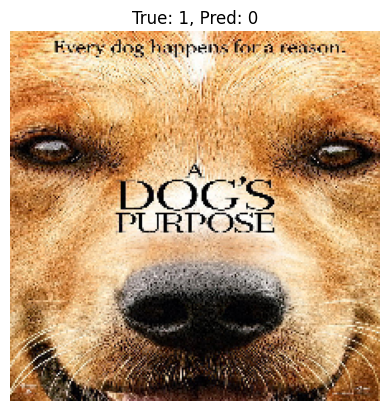

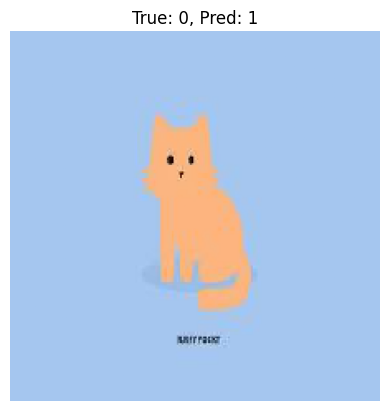

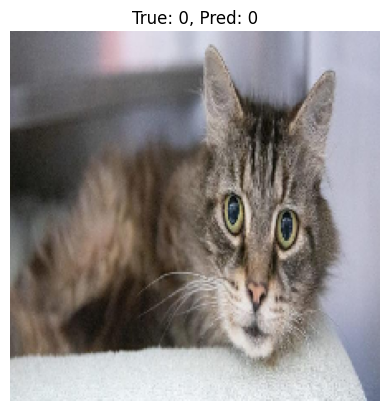

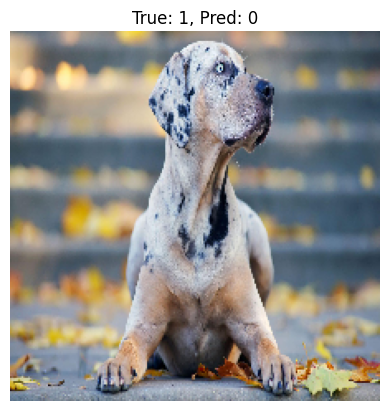

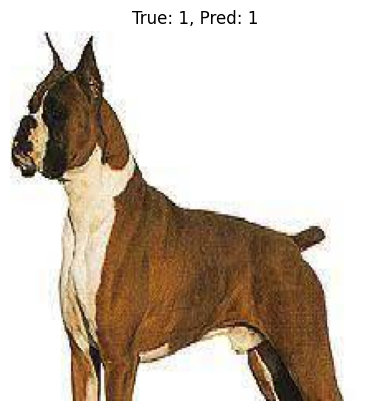

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(validation_generator)
preds = model.predict(images)

for i in range(5):
    plt.imshow(images[i])
    plt.title(f"True: {int(labels[i])}, Pred: {int(preds[i] > 0.5)}")
    plt.axis('off')
    plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

# Go through the whole validation set
for i in range(len(validation_generator)):
    images, labels = validation_generator[i]
    preds = model.predict(images)
    y_true.extend(labels)
    y_pred.extend(preds.flatten())

# Binarize predictions
y_pred_bin = [1 if p > 0.5 else 0 for p in y_pred]

# Print classification report
print(classification_report(y_true, y_pred_bin, target_names=["Cat", "Dog"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
              precision    recall  f1-score   support

         Cat       0.62      0.57      0.60        70
         Dog       0.61      0.66      0.63        70

    accuracy                           0.61       140
   macro avg       0.62      0.61      0.61       140
weighted avg       0.62      0.61      0.61       140



##Trying out prdifened models


In [54]:
rain_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

val_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

base_models = {
    'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

results = {}

for name, base_model in base_models.items():
    print(f"\nTraining {name}...")

    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=20,
        callbacks=[early_stopping],
        verbose=1
    )

    results[name] = history

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.

Training MobileNetV2...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5207 - loss: 0.8169 - val_accuracy: 0.8357 - val_loss: 0.4492
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.7984 - loss: 0.4567 - val_accuracy: 0.8857 - val_loss: 0.3102
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9040 - loss: 0.2813 - val_accuracy: 0.9143 - val_loss: 0.2542
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8908 - loss: 0.2745 - val_accuracy: 0.9071 - val_loss: 0.2347
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9169 - loss: 0.2383 - val_accuracy: 0.9214 - val_loss: 0.2084
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9196 - loss: 0.2085 - val_accuracy: 0.9357 - val_loss: 0.1964
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9269 - loss: 0.1878 - val_accuracy: 0.9429 - val_loss: 0.1813
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9312 - loss: 0.1594 - val_accuracy: 0.9357 - val_loss:

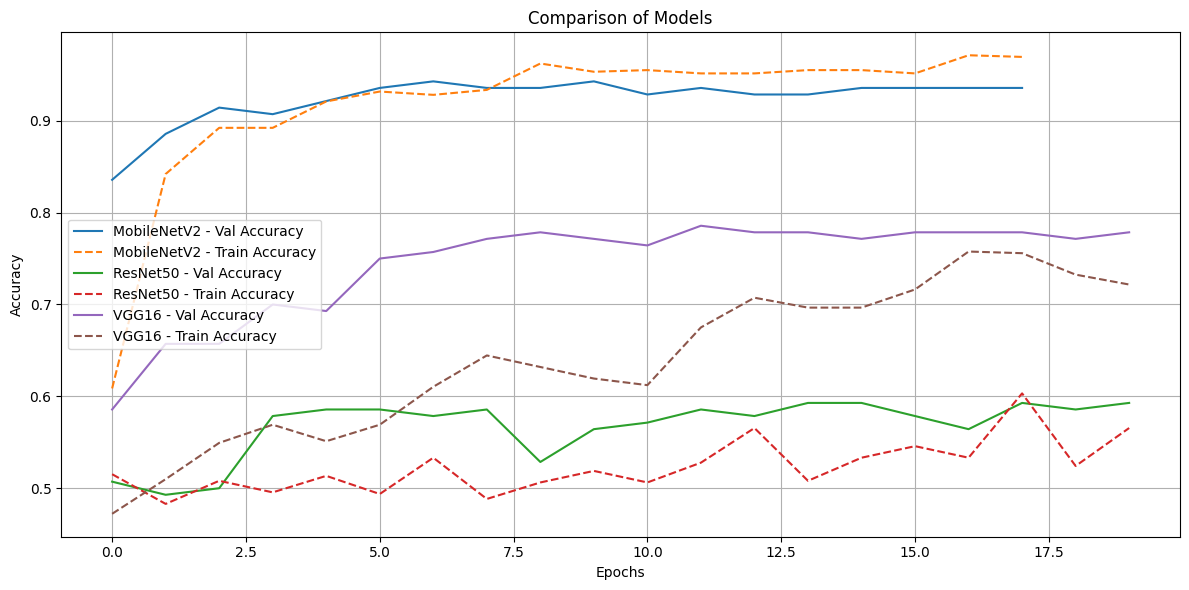

In [55]:
plt.figure(figsize=(12, 6))
for name, history in results.items():
    plt.plot(history.history['val_accuracy'], label=f'{name} - Val Accuracy')
    plt.plot(history.history['accuracy'], linestyle='--', label=f'{name} - Train Accuracy')

plt.title("Comparison of Models")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##training the best model till now  by shuffeling the data because there is overfitting

In [28]:
fold_no = 1
for train_index, val_index in kfold.split(train_df['filepath'], train_df['label']):
    print(f"Training Fold {fold_no}...")

    # Split the data into training and validation sets
    train_data = train_df.iloc[train_index]
    val_data = train_df.iloc[val_index]

    # Prepare generators for this fold
    train_gen = train_datagen.flow_from_dataframe(
        train_data, x_col='filepath', y_col='label',
        target_size=image_size, class_mode='binary', batch_size=batch_size, shuffle=True)

    val_gen = val_datagen.flow_from_dataframe(
        val_data, x_col='filepath', y_col='label',
        target_size=image_size, class_mode='binary', batch_size=batch_size, shuffle=False)

    # Build the model
    model = build_model()

    # Set up Early Stopping and Model Checkpoint
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    checkpoint = ModelCheckpoint(f"best_model_fold_{fold_no}.h5", monitor='val_loss',
                                 save_best_only=True, mode='min', verbose=1)

    # Train the model with both callbacks
    history = model.fit(train_gen, validation_data=val_gen, epochs=epochs,
                        callbacks=[early_stopping, checkpoint], verbose=1)

    # Store history for later analysis
    histories.append(history)

    fold_no += 1


In [38]:
def create_dataframe_from_dir(base_dir):
    filepaths = []
    labels = []
    for label in ['cats', 'dogs']:
        class_dir = os.path.join(base_dir, label)
        for fname in os.listdir(class_dir):
            filepaths.append(os.path.join(class_dir, fname))
            labels.append(label)
    return pd.DataFrame({'filepath': filepaths, 'label': labels})

df = create_dataframe_from_dir(train_dir)

k = 5
epochs = 25
batch_size = 32
input_shape = (224, 224, 3)
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
histories = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(df)):
    print(f"\n--- Fold {fold + 1} ---")
    train_data = df.iloc[train_idx].copy()
    val_data = df.iloc[val_idx].copy()

    train_data['label'] = train_data['label'].astype(str)
    val_data['label'] = val_data['label'].astype(str)

    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_dataframe(
        train_data, x_col='filepath', y_col='label',
        target_size=(224, 224), class_mode='binary',
        batch_size=batch_size
    )

    val_gen = val_datagen.flow_from_dataframe(
        val_data, x_col='filepath', y_col='label',
        target_size=(224, 224), class_mode='binary',
        batch_size=batch_size
    )

    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Callbacks
    ckpt_path = f'model_fold_{fold+1}.h5'
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ModelCheckpoint(ckpt_path, monitor='val_loss', save_best_only=True)
    ]

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    histories.append(history.history)




--- Fold 1 ---
Found 445 validated image filenames belonging to 2 classes.
Found 112 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5306 - loss: 0.7909

14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5295 - loss: 0.7906 - val_accuracy: 0.5268 - val_loss: 0.7516
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5513 - loss: 0.7277

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5533 - loss: 0.7260 - val_accuracy: 0.6250 - val_loss: 0.6634
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6429 - loss: 0.6324

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6435 - loss: 0.6324 - val_accuracy: 0.6607 - val_loss: 0.6004
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6901 - loss: 0.5961

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6916 - loss: 0.5948 - val_accuracy: 0.7411 - val_loss: 0.5485
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7523 - loss: 0.5421

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7539 - loss: 0.5412 - val_accuracy: 0.7857 - val_loss: 0.5031
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8161 - loss: 0.4830

14/14 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.8160 - loss: 0.4832 - val_accuracy: 0.8036 - val_loss: 0.4651
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8181 - loss: 0.4674

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8197 - loss: 0.4662 - val_accuracy: 0.8393 - val_loss: 0.4306
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8579 - loss: 0.4256

14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8585 - loss: 0.4251 - val_accuracy: 0.8571 - val_loss: 0.4008
Epoch 9/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8953 - loss: 0.3823

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8951 - loss: 0.3827 - val_accuracy: 0.8661 - val_loss: 0.3757
Epoch 10/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9061 - loss: 0.3639

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9063 - loss: 0.3639 - val_accuracy: 0.8929 - val_loss: 0.3533
Epoch 11/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8989 - loss: 0.3730

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8999 - loss: 0.3710 - val_accuracy: 0.8929 - val_loss: 0.3337
Epoch 12/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9285 - loss: 0.3227

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9282 - loss: 0.3227 - val_accuracy: 0.9018 - val_loss: 0.3170
Epoch 13/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9434 - loss: 0.3078

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9431 - loss: 0.3077 - val_accuracy: 0.9196 - val_loss: 0.3005
Epoch 14/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9190 - loss: 0.3037

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9205 - loss: 0.3028 - val_accuracy: 0.9286 - val_loss: 0.2869
Epoch 15/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9492 - loss: 0.2682

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9490 - loss: 0.2687 - val_accuracy: 0.9286 - val_loss: 0.2746
Epoch 16/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9552 - loss: 0.2609

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9548 - loss: 0.2611 - val_accuracy: 0.9375 - val_loss: 0.2628
Epoch 17/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9579 - loss: 0.2457

14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9574 - loss: 0.2462 - val_accuracy: 0.9375 - val_loss: 0.2525
Epoch 18/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9573 - loss: 0.2438

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9569 - loss: 0.2438 - val_accuracy: 0.9464 - val_loss: 0.2434
Epoch 19/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9445 - loss: 0.2455

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9449 - loss: 0.2448 - val_accuracy: 0.9464 - val_loss: 0.2349
Epoch 20/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9457 - loss: 0.2419

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9461 - loss: 0.2408 - val_accuracy: 0.9464 - val_loss: 0.2273
Epoch 21/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9529 - loss: 0.2156

14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9527 - loss: 0.2157 - val_accuracy: 0.9554 - val_loss: 0.2200
Epoch 22/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9708 - loss: 0.2016

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9697 - loss: 0.2022 - val_accuracy: 0.9554 - val_loss: 0.2137
Epoch 23/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9462 - loss: 0.2199

14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9468 - loss: 0.2188 - val_accuracy: 0.9554 - val_loss: 0.2076
Epoch 24/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9523 - loss: 0.1975

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9525 - loss: 0.1974 - val_accuracy: 0.9554 - val_loss: 0.2019
Epoch 25/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9403 - loss: 0.1959

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9413 - loss: 0.1956 - val_accuracy: 0.9554 - val_loss: 0.1966

--- Fold 2 ---
Found 445 validated image filenames belonging to 2 classes.
Found 112 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4921 - loss: 0.7715

14/14 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.4944 - loss: 0.7692 - val_accuracy: 0.6518 - val_loss: 0.6563
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5912 - loss: 0.6802

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5931 - loss: 0.6791 - val_accuracy: 0.7232 - val_loss: 0.6078
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6413 - loss: 0.6322

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6437 - loss: 0.6302 - val_accuracy: 0.7589 - val_loss: 0.5660
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6915 - loss: 0.5659

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6939 - loss: 0.5650 - val_accuracy: 0.7679 - val_loss: 0.5294
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7707 - loss: 0.4998

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7714 - loss: 0.5003 - val_accuracy: 0.8036 - val_loss: 0.4971
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8208 - loss: 0.4731

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8218 - loss: 0.4727 - val_accuracy: 0.8125 - val_loss: 0.4692
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8561 - loss: 0.4512

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8567 - loss: 0.4500 - val_accuracy: 0.8304 - val_loss: 0.4457
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8885 - loss: 0.4031

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8878 - loss: 0.4030 - val_accuracy: 0.8393 - val_loss: 0.4245
Epoch 9/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8772 - loss: 0.3784

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8783 - loss: 0.3782 - val_accuracy: 0.8393 - val_loss: 0.4064
Epoch 10/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9067 - loss: 0.3573

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9069 - loss: 0.3569 - val_accuracy: 0.8482 - val_loss: 0.3902
Epoch 11/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9090 - loss: 0.3363

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9095 - loss: 0.3360 - val_accuracy: 0.8661 - val_loss: 0.3760
Epoch 12/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9364 - loss: 0.3071

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9359 - loss: 0.3075 - val_accuracy: 0.8661 - val_loss: 0.3635
Epoch 13/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9183 - loss: 0.3059

14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9191 - loss: 0.3053 - val_accuracy: 0.8661 - val_loss: 0.3520
Epoch 14/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9334 - loss: 0.2720

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9333 - loss: 0.2726 - val_accuracy: 0.8661 - val_loss: 0.3419
Epoch 15/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9365 - loss: 0.2756

14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9366 - loss: 0.2751 - val_accuracy: 0.8839 - val_loss: 0.3329
Epoch 16/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9587 - loss: 0.2347

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9574 - loss: 0.2361 - val_accuracy: 0.8839 - val_loss: 0.3249
Epoch 17/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9529 - loss: 0.2312

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9521 - loss: 0.2321 - val_accuracy: 0.8929 - val_loss: 0.3174
Epoch 18/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9405 - loss: 0.2406

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9406 - loss: 0.2402 - val_accuracy: 0.8929 - val_loss: 0.3102
Epoch 19/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9370 - loss: 0.2384

14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9375 - loss: 0.2375 - val_accuracy: 0.9018 - val_loss: 0.3040
Epoch 20/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9407 - loss: 0.2252

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9409 - loss: 0.2246 - val_accuracy: 0.9018 - val_loss: 0.2984
Epoch 21/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9594 - loss: 0.2008

14/14 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9586 - loss: 0.2013 - val_accuracy: 0.9018 - val_loss: 0.2932
Epoch 22/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9503 - loss: 0.2078

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9505 - loss: 0.2074 - val_accuracy: 0.9018 - val_loss: 0.2881
Epoch 23/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9446 - loss: 0.1975

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9451 - loss: 0.1973 - val_accuracy: 0.9107 - val_loss: 0.2833
Epoch 24/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9537 - loss: 0.1891

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9537 - loss: 0.1890 - val_accuracy: 0.9107 - val_loss: 0.2787
Epoch 25/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9366 - loss: 0.2016

14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9377 - loss: 0.2003 - val_accuracy: 0.9107 - val_loss: 0.2750

--- Fold 3 ---
Found 446 validated image filenames belonging to 2 classes.
Found 111 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4424 - loss: 0.8053

14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.4426 - loss: 0.8043 - val_accuracy: 0.5045 - val_loss: 0.7525
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4932 - loss: 0.7359

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4956 - loss: 0.7345 - val_accuracy: 0.6036 - val_loss: 0.6854
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6326 - loss: 0.6470

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6341 - loss: 0.6470 - val_accuracy: 0.6577 - val_loss: 0.6283
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7151 - loss: 0.5963

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7154 - loss: 0.5958 - val_accuracy: 0.7207 - val_loss: 0.5779
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7995 - loss: 0.5355

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7985 - loss: 0.5358 - val_accuracy: 0.7928 - val_loss: 0.5340
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8075 - loss: 0.4999

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8081 - loss: 0.4997 - val_accuracy: 0.8468 - val_loss: 0.4961
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8072 - loss: 0.4894

14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8100 - loss: 0.4874 - val_accuracy: 0.8559 - val_loss: 0.4634
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8571 - loss: 0.4522

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8578 - loss: 0.4506 - val_accuracy: 0.8468 - val_loss: 0.4352
Epoch 9/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8739 - loss: 0.3969

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8745 - loss: 0.3970 - val_accuracy: 0.8468 - val_loss: 0.4096
Epoch 10/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9028 - loss: 0.3758

14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9024 - loss: 0.3758 - val_accuracy: 0.8739 - val_loss: 0.3869
Epoch 11/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9002 - loss: 0.3728

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9007 - loss: 0.3714 - val_accuracy: 0.8739 - val_loss: 0.3673
Epoch 12/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9238 - loss: 0.3275

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9235 - loss: 0.3279 - val_accuracy: 0.8829 - val_loss: 0.3494
Epoch 13/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9279 - loss: 0.3053

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9273 - loss: 0.3060 - val_accuracy: 0.8829 - val_loss: 0.3338
Epoch 14/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9222 - loss: 0.3093

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9223 - loss: 0.3088 - val_accuracy: 0.8919 - val_loss: 0.3195
Epoch 15/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9029 - loss: 0.3140

14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9046 - loss: 0.3122 - val_accuracy: 0.8919 - val_loss: 0.3064
Epoch 16/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9055 - loss: 0.3039

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9075 - loss: 0.3020 - val_accuracy: 0.8919 - val_loss: 0.2947
Epoch 17/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9459 - loss: 0.2577

14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9455 - loss: 0.2581 - val_accuracy: 0.9009 - val_loss: 0.2837
Epoch 18/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9211 - loss: 0.2616

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9223 - loss: 0.2610 - val_accuracy: 0.9009 - val_loss: 0.2741
Epoch 19/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9555 - loss: 0.2224

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9545 - loss: 0.2238 - val_accuracy: 0.9009 - val_loss: 0.2650
Epoch 20/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9298 - loss: 0.2501

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9306 - loss: 0.2491 - val_accuracy: 0.9009 - val_loss: 0.2566
Epoch 21/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9348 - loss: 0.2297

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9353 - loss: 0.2295 - val_accuracy: 0.9099 - val_loss: 0.2489
Epoch 22/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9453 - loss: 0.2128

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9451 - loss: 0.2133 - val_accuracy: 0.9099 - val_loss: 0.2417
Epoch 23/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9532 - loss: 0.2069

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9528 - loss: 0.2073 - val_accuracy: 0.9099 - val_loss: 0.2348
Epoch 24/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9474 - loss: 0.1951

14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9475 - loss: 0.1959 - val_accuracy: 0.9099 - val_loss: 0.2287
Epoch 25/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9495 - loss: 0.2108

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9497 - loss: 0.2101 - val_accuracy: 0.9099 - val_loss: 0.2229

--- Fold 4 ---
Found 446 validated image filenames belonging to 2 classes.
Found 111 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4843 - loss: 0.7714

14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.4868 - loss: 0.7692 - val_accuracy: 0.5135 - val_loss: 0.7714
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5528 - loss: 0.7035

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5556 - loss: 0.7013 - val_accuracy: 0.6036 - val_loss: 0.7006
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6616 - loss: 0.6318

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6634 - loss: 0.6303 - val_accuracy: 0.6937 - val_loss: 0.6396
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7457 - loss: 0.5680

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7463 - loss: 0.5672 - val_accuracy: 0.7297 - val_loss: 0.5859
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8079 - loss: 0.4981

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8064 - loss: 0.4989 - val_accuracy: 0.7748 - val_loss: 0.5386
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7783 - loss: 0.4935

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7807 - loss: 0.4920 - val_accuracy: 0.8108 - val_loss: 0.4988
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8545 - loss: 0.4386

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8540 - loss: 0.4384 - val_accuracy: 0.8468 - val_loss: 0.4622
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8559 - loss: 0.4150

14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8571 - loss: 0.4144 - val_accuracy: 0.8649 - val_loss: 0.4325
Epoch 9/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8796 - loss: 0.3796

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8805 - loss: 0.3797 - val_accuracy: 0.8739 - val_loss: 0.4050
Epoch 10/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9099 - loss: 0.3573

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9093 - loss: 0.3573 - val_accuracy: 0.8829 - val_loss: 0.3823
Epoch 11/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9047 - loss: 0.3442

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9051 - loss: 0.3437 - val_accuracy: 0.8829 - val_loss: 0.3618
Epoch 12/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9173 - loss: 0.3317

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9171 - loss: 0.3309 - val_accuracy: 0.8829 - val_loss: 0.3422
Epoch 13/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9313 - loss: 0.2943

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9309 - loss: 0.2949 - val_accuracy: 0.8829 - val_loss: 0.3265
Epoch 14/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9110 - loss: 0.3060

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9120 - loss: 0.3049 - val_accuracy: 0.9009 - val_loss: 0.3104
Epoch 15/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9195 - loss: 0.2895

14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9201 - loss: 0.2886 - val_accuracy: 0.9009 - val_loss: 0.2993
Epoch 16/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9125 - loss: 0.2954

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9136 - loss: 0.2933 - val_accuracy: 0.9099 - val_loss: 0.2867
Epoch 17/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9302 - loss: 0.2576

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9303 - loss: 0.2574 - val_accuracy: 0.9189 - val_loss: 0.2749
Epoch 18/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9334 - loss: 0.2470

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9332 - loss: 0.2468 - val_accuracy: 0.9279 - val_loss: 0.2648
Epoch 19/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9279 - loss: 0.2368

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9280 - loss: 0.2367 - val_accuracy: 0.9279 - val_loss: 0.2563
Epoch 20/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9341 - loss: 0.2339

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9340 - loss: 0.2335 - val_accuracy: 0.9279 - val_loss: 0.2474
Epoch 21/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9138 - loss: 0.2368

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9154 - loss: 0.2356 - val_accuracy: 0.9369 - val_loss: 0.2395
Epoch 22/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9554 - loss: 0.2130

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9543 - loss: 0.2130 - val_accuracy: 0.9459 - val_loss: 0.2327
Epoch 23/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9473 - loss: 0.1915

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9467 - loss: 0.1925 - val_accuracy: 0.9459 - val_loss: 0.2262
Epoch 24/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9484 - loss: 0.1845

14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9480 - loss: 0.1855 - val_accuracy: 0.9459 - val_loss: 0.2197
Epoch 25/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9323 - loss: 0.2067

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9331 - loss: 0.2059 - val_accuracy: 0.9459 - val_loss: 0.2145

--- Fold 5 ---
Found 446 validated image filenames belonging to 2 classes.
Found 111 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4476 - loss: 0.9431

14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.4489 - loss: 0.9404 - val_accuracy: 0.4505 - val_loss: 0.8790
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4986 - loss: 0.8438

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4990 - loss: 0.8415 - val_accuracy: 0.4775 - val_loss: 0.8008
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5062 - loss: 0.7701

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5077 - loss: 0.7679 - val_accuracy: 0.5225 - val_loss: 0.7335
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6128 - loss: 0.6873

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6127 - loss: 0.6864 - val_accuracy: 0.6036 - val_loss: 0.6763
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6535 - loss: 0.6507

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6546 - loss: 0.6487 - val_accuracy: 0.6306 - val_loss: 0.6262
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6790 - loss: 0.5935

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6812 - loss: 0.5921 - val_accuracy: 0.6667 - val_loss: 0.5817
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7674 - loss: 0.5192

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7662 - loss: 0.5200 - val_accuracy: 0.6937 - val_loss: 0.5423
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7261 - loss: 0.5320

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7294 - loss: 0.5295 - val_accuracy: 0.7477 - val_loss: 0.5081
Epoch 9/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8110 - loss: 0.4612

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8104 - loss: 0.4612 - val_accuracy: 0.7928 - val_loss: 0.4776
Epoch 10/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8182 - loss: 0.4348

14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8179 - loss: 0.4348 - val_accuracy: 0.8018 - val_loss: 0.4508
Epoch 11/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8347 - loss: 0.4099

14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8345 - loss: 0.4098 - val_accuracy: 0.8288 - val_loss: 0.4266
Epoch 12/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8130 - loss: 0.4179

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8151 - loss: 0.4159 - val_accuracy: 0.8468 - val_loss: 0.4057
Epoch 13/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8888 - loss: 0.3595

14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8873 - loss: 0.3600 - val_accuracy: 0.8649 - val_loss: 0.3872
Epoch 14/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8938 - loss: 0.3364

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8926 - loss: 0.3373 - val_accuracy: 0.8649 - val_loss: 0.3700
Epoch 15/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8836 - loss: 0.3426

14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8841 - loss: 0.3420 - val_accuracy: 0.8649 - val_loss: 0.3547
Epoch 16/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9222 - loss: 0.3034

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9210 - loss: 0.3044 - val_accuracy: 0.8649 - val_loss: 0.3408
Epoch 17/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8983 - loss: 0.3022

14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8991 - loss: 0.3024 - val_accuracy: 0.8649 - val_loss: 0.3283
Epoch 18/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9209 - loss: 0.3006

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9208 - loss: 0.3001 - val_accuracy: 0.8649 - val_loss: 0.3163
Epoch 19/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9150 - loss: 0.2962

14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9158 - loss: 0.2952 - val_accuracy: 0.8649 - val_loss: 0.3062
Epoch 20/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9264 - loss: 0.2966

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9269 - loss: 0.2950 - val_accuracy: 0.8649 - val_loss: 0.2966
Epoch 21/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9389 - loss: 0.2494

14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9388 - loss: 0.2503 - val_accuracy: 0.8739 - val_loss: 0.2877
Epoch 22/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9452 - loss: 0.2564

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9448 - loss: 0.2562 - val_accuracy: 0.8649 - val_loss: 0.2798
Epoch 23/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9512 - loss: 0.2444

14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9506 - loss: 0.2445 - val_accuracy: 0.8649 - val_loss: 0.2722
Epoch 24/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9500 - loss: 0.2289

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9494 - loss: 0.2296 - val_accuracy: 0.8919 - val_loss: 0.2643
Epoch 25/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9368 - loss: 0.2444

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9373 - loss: 0.2435 - val_accuracy: 0.8739 - val_loss: 0.2580


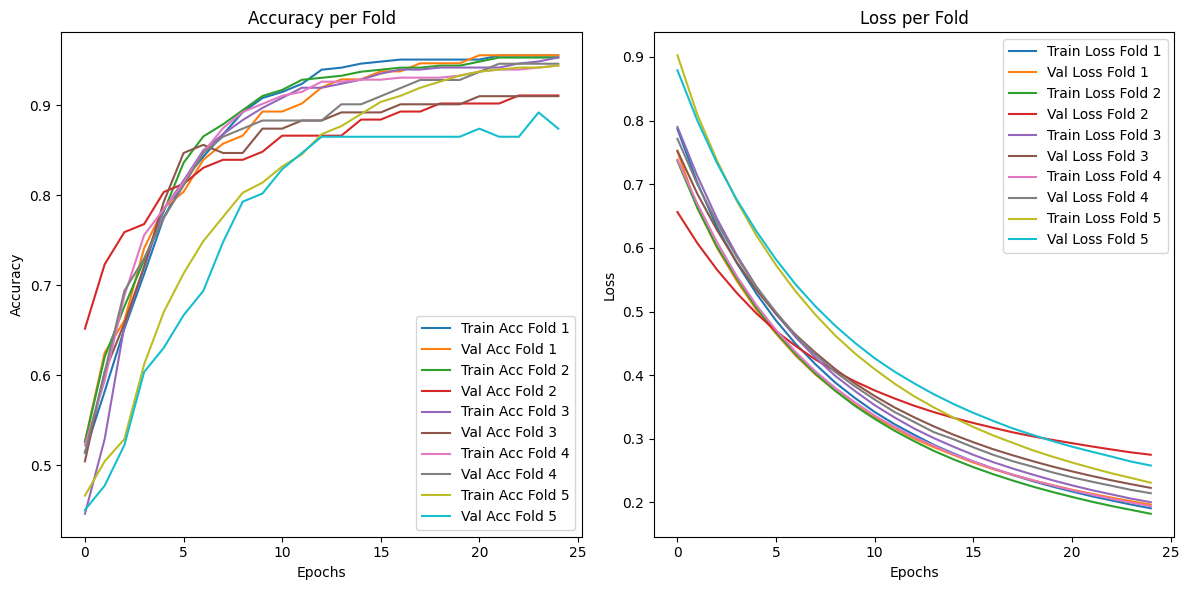

In [39]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i, history in enumerate(histories):
    plt.plot(history['accuracy'], label=f'Train Acc Fold {i+1}')
    plt.plot(history['val_accuracy'], label=f'Val Acc Fold {i+1}')
plt.title('Accuracy per Fold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for i, history in enumerate(histories):
    plt.plot(history['loss'], label=f'Train Loss Fold {i+1}')
    plt.plot(history['val_loss'], label=f'Val Loss Fold {i+1}')
plt.title('Loss per Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('fold_performance_plot.png')
plt.show()


Found 140 validated image filenames belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


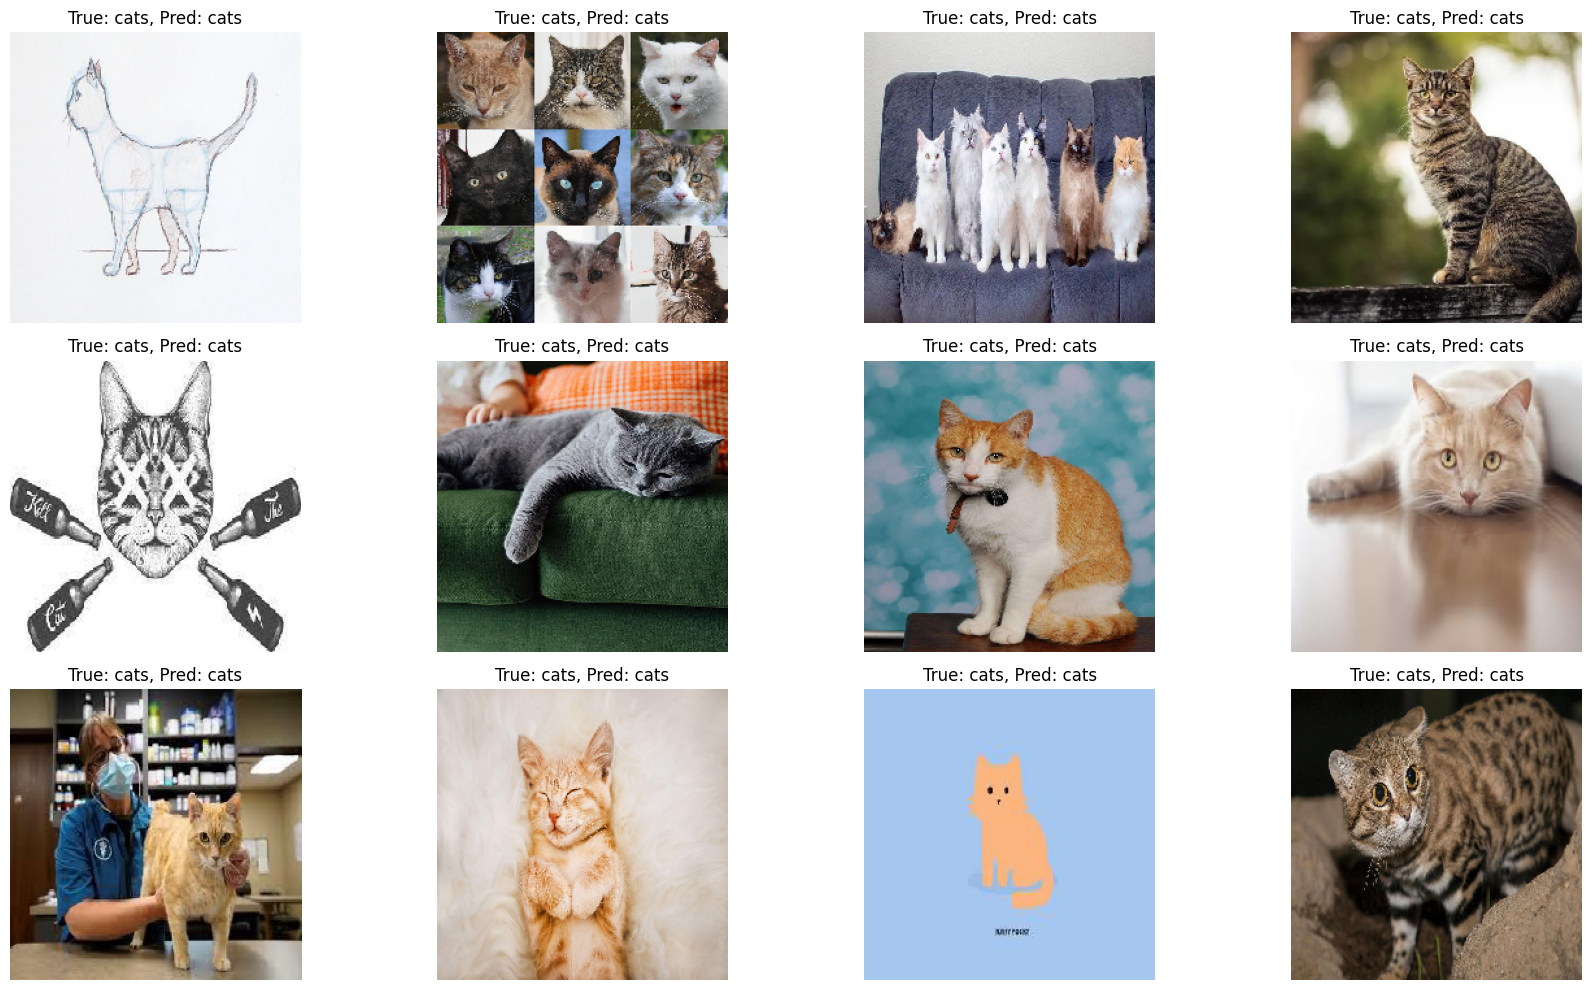

In [58]:
test_dir = "./dataset/test"
model = load_model("model_fold_3.h5")

int_to_str = {0: 'cats', 1: 'dogs'}
str_to_int = {'cats': 0, 'dogs': 1}

cat_paths = [os.path.join(test_dir, 'cats', fname) for fname in os.listdir(os.path.join(test_dir, 'cats'))]
dog_paths = [os.path.join(test_dir, 'dogs', fname) for fname in os.listdir(os.path.join(test_dir, 'dogs'))]

test_filepaths = cat_paths + dog_paths
test_labels = ['cats'] * len(cat_paths) + ['dogs'] * len(dog_paths)

test_df = pd.DataFrame({'filepath': test_filepaths, 'label': test_labels})


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=16,
    shuffle=False
)

images, true_labels = next(test_generator)
pred_probs = model.predict(images)
pred_labels = (pred_probs > 0.5).astype(int)

plt.figure(figsize=(18, 10))
for i in range(min(12, len(images))):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    true_class = int_to_str[int(true_labels[i])]
    pred_class = int_to_str[pred_labels[i][0]]
    plt.title(f"True: {true_class}, Pred: {pred_class}")
plt.tight_layout()
plt.show()

#Thank you 👏